### ML : KNN model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 데이터 불러오기
df = pd.read_csv("./data/originalfile.csv")
df.head()

,path,filename,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,./data/genres/pop/pop.00080.au,pop.00080.au,0.433540,0.215662,3151.406048,3220.623382,7294.559912,0.127557,-44.986890,69.775894,...,-0.841709,2.132197,1.083206,-0.077104,0.648073,-1.484534,3.725630,4.553656,4.274244,pop
1,./data/genres/pop/pop.00022.au,pop.00022.au,0.386972,0.196038,3206.647959,3126.207007,7019.799238,0.141531,-45.730503,65.273964,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,pop
2,./data/genres/pop/pop.00073.au,pop.00073.au,0.423550,0.259782,3669.810467,3295.063699,7876.372739,0.161797,-8.573006,54.295788,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,pop
3,./data/genres/pop/pop.00047.au,pop.00047.au,0.433407,0.215733,3151.342623,3220.369559,7293.569019,0.127355,-45.029280,69.754700,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,pop
4,./data/genres/pop/pop.00016.au,pop.00016.au,0.388811,0.146568,3488.897943,3205.348889,7496.760520,0.153314,-97.053980,51.834522,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649556,-2.744086,0.305748,pop


In [5]:
# Data set preprocessing
# Normalized, MinMax Scaler
import sklearn
    
X = df.drop(columns=['path', 'filename','label']) 
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.532061,0.536080,0.667736,0.889228,0.825533,0.418530,0.853465,0.366224,0.694183,0.270217,...,0.701673,0.385326,0.730800,0.444777,0.584212,0.560436,0.548720,0.573742,0.694426,0.685820
1,0.437363,0.486079,0.682028,0.853042,0.790876,0.473776,0.852214,0.343084,0.701606,0.334629,...,0.697476,0.474026,0.778014,0.487058,0.646376,0.456159,0.553539,0.332480,0.531698,0.491080
2,0.511746,0.648499,0.801851,0.917757,0.898920,0.553899,0.914742,0.286654,0.756454,0.320315,...,0.541115,0.429537,0.630571,0.319163,0.497570,0.424646,0.659935,0.432071,0.703255,0.647055
3,0.531791,0.536261,0.667720,0.889130,0.825408,0.417728,0.853394,0.366115,0.694409,0.270642,...,0.701745,0.385253,0.729999,0.446057,0.587015,0.563872,0.549076,0.571814,0.691888,0.683678
4,0.441102,0.360029,0.755048,0.883374,0.851038,0.520360,0.765847,0.274002,0.741352,0.394589,...,0.557595,0.395622,0.651578,0.297474,0.503949,0.424945,0.522805,0.340868,0.474654,0.573366


In [6]:
# Data Split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 26) (700,)
(300, 26) (300,)


In [7]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))


KNeighborsClassifier()
Train set Accuracy :  0.7614285714285715
Test set Accuracy :  0.64


In [8]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.62666667 0.61       0.64666667 0.63       0.64       0.65
 0.64       0.60666667 0.61      ]


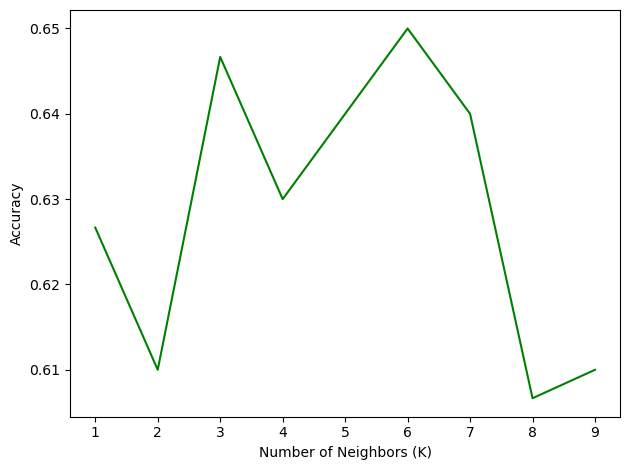

In [9]:
# KNN visualization
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [10]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.65 with k= 6
